#  <center> Data Origin </center>

##### <center> Data was donate by [Paulo Cortez , Department of Information Systems | School of Engineering | University of Minho, Portugal](https://pcortez.dsi.uminho.pt/)  <br>  to [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) and is being using by [Demetrio Esteban Alférez](https://linkedin.com/in/demstalfer) </center>

<strong>Data Set Information:</strong> <br>

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.<br> For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. <br>there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). <br> Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.



Relevant Papers:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Available at: [Web Link]


Citation Request:

Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



### References: 

https://archive.ics.uci.edu/ml/datasets/wine+quality

http://www3.dsi.uminho.pt/pcortez/

https://rpubs.com/Dhivyasri/908195

https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802

https://guldenturgay.medium.com/

https://www.kaggle.com/code/mnds18/prediction-of-quality-of-wine/notebook

https://github.com/demstalferez/SpaceShip

In [1]:
#Downloading al data from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
import re 
import os 
# Find the cvs outprocessed in the folder datamining, after a good run of the code, i will save the data in a newcsv file stored in front 
!wget -O /home/dm/Desktop/wine_quality/datamining/winequality-red.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget -O /home/dm/Desktop/wine_quality/datamining/winequality-white.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
!wget -O /home/dm/Desktop/wine_quality/datamining/wine_names.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

--2022-07-16 16:53:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘/home/dm/Desktop/wine_quality/datamining/winequality-red.csv’

/home/dm/Desktop/wi 100%[===================>]  82,23K  20,7KB/s    in 4,0s    

2022-07-16 16:53:44 (20,7 KB/s) - ‘/home/dm/Desktop/wine_quality/datamining/winequality-red.csv’ saved [84199/84199]

--2022-07-16 16:53:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [applicati

#  <center> Data Info </center>

<strong>Attribute Information:</strong> <br>

For more information, read [Cortez et al., 2009].<br>
Input variables (based on physicochemical tests): <br>
1 - fixed acidity <br>
2 - volatile acidity <br> 
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) <br><br><br>

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np
from joypy import joyplot
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import xarray as xr
from ipywidgets import widgets
import datetime
import plotly.io as pio
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline



#  <center> Raught Data </center>

In [3]:
#red wines Dataset
red = pd.read_csv('/home/dm/Desktop/wine_quality/datamining/winequality-red.csv', sep=';', header=0)

#white wines Dataset
white = pd.read_csv("/home/dm/Desktop/wine_quality/datamining/winequality-white.csv", sep=';', header=0)



#  <center> Red Wine </center>

In [4]:
pd.DataFrame(red.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red.shape

(1599, 12)

<AxesSubplot:>

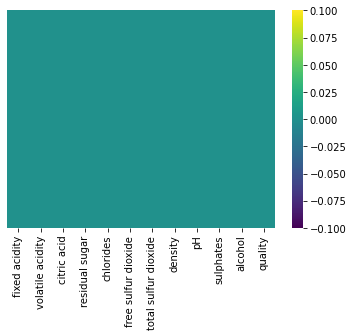

In [6]:
sns.heatmap(red.isnull(), cmap='viridis', yticklabels=False) #Check if there are any null values

In [7]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<center> Red Wine Alcohol vs Quality </center>

In [8]:
px.scatter(red, x="quality", y="alcohol", color="quality", size="alcohol", size_max=15, template="plotly_dark")

In [9]:

index_vals = red['quality'].astype('category').cat.codes



fig = go.Figure(data= go.Splom( dimensions= [dict(label='quality', values=red['quality']),
                            dict(label='fixed acidity', values=red['fixed acidity']),
                            dict(label='volatile acidity', values=red['volatile acidity']),
                            dict(label='citric acid', values=red['citric acid']),
                            dict(label='pH', values=red['pH']),
                            dict(label='total sulfur dioxide', values=red['total sulfur dioxide']),
                            dict(label='alcohol', values=red['alcohol']),
                            dict(label='pH', values=red['pH']),
                            dict(label='sulphates', values=red['sulphates']),
                            dict(label='residual sugar', values=red['residual sugar'])],
                           

                            text = red['quality'],
                            marker = dict( color = index_vals, showscale=False, colorscale='Viridis')))

fig.update_layout(title='Red Wines MATRIX Chemical comparaison', autosize=False, width=1800, height=900, template="plotly_dark")


fig.show()

In [10]:
fig = px.box(red, x="quality", y="alcohol", color="quality", template="plotly_dark")
fig.update_layout(title='Red Wines Alcohol Analysis', autosize=False, width=1800, height=700, template="plotly_dark")
fig.show()

In [11]:
red_ridgeline = red.copy()
red_ridgeline = red_ridgeline.groupby('quality').mean() 

#Fixing index 
red_ridgeline.reset_index(inplace=True)

#Creating a new column named score and filling it whit the quality score of the wine from bad to excellent
# legend: 1- terrible, 2- bad, 3- normal, 4- good, 5- very good, 6- excellent, 7-Brilliant , 8-BuyandSave , 9- OneInaMillion

def scored_adding(df):
    df['score'] = df['quality'].map({1: "DontDrink", 2: "SuperBad", 3: "Bad", 4: "Normal-low", 5: "Normal", 6: "Good", 7: "Excellent", 8: "Brilliant", 9: "GoldQuality"})
    return df

scored_adding(red_ridgeline)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,Bad
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,Normal-low
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,Normal
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,Good
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,Excellent
5,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,Brilliant


In [12]:
#Ploting by density, pH and sulphates vs Score Relation to find the best quality posible
fig = px.scatter_3d(red_ridgeline, x="density", y="pH",z="sulphates", color="score", template="plotly_dark")
fig.update_layout(title='Red Wines, finding the ideal position to become a GoldQuality', autosize=False, width=1800, height=500, template="plotly_dark")
fig.show()

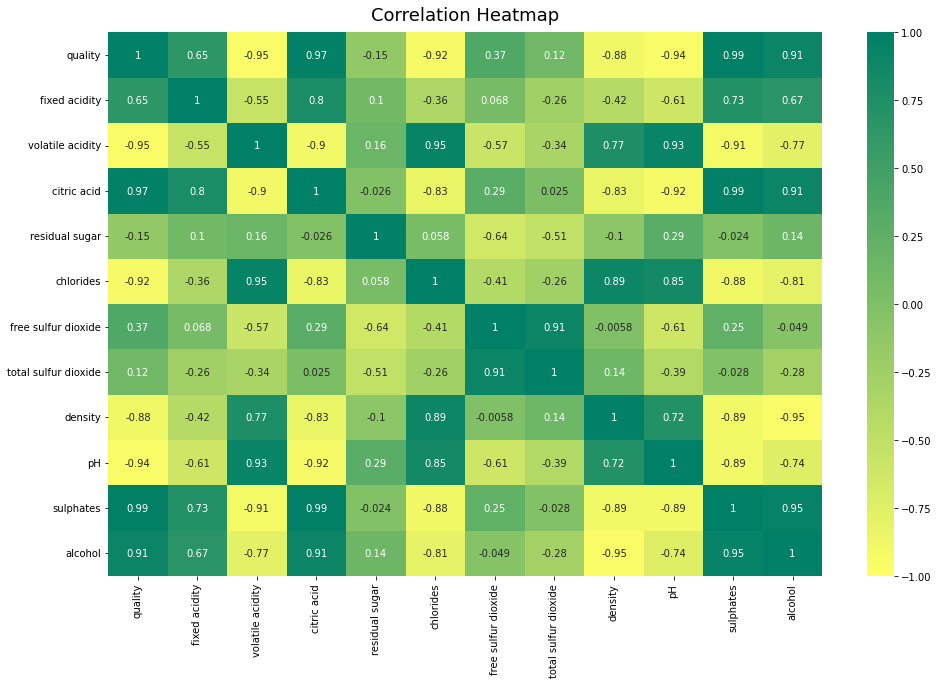

In [13]:
#Using seaborn to create a beatifull heatmap

#Correlation chemical map to observe the best variables 
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(red_ridgeline.corr(), vmin=-1, vmax=1, annot=True, cmap='summer_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


#  <center> White Wine </center>

In [14]:
pd.DataFrame(white.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
white.shape

(4898, 12)

<AxesSubplot:>

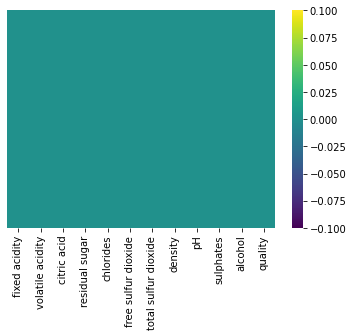

In [16]:
sns.heatmap(white.isnull(), cmap='viridis', yticklabels=False) #Check if there are any null values

In [17]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<center> white Wine Alcohol vs Quality </center>

In [18]:
px.scatter(white, x="quality", y="alcohol", color="quality", size="alcohol", size_max=15, template="plotly_dark")

In [19]:

index_vals = white['quality'].astype('category').cat.codes



fig = go.Figure(data= go.Splom( dimensions= [dict(label='quality', values=white['quality']),
                            dict(label='fixed acidity', values=white['fixed acidity']),
                            dict(label='volatile acidity', values=white['volatile acidity']),
                            dict(label='citric acid', values=white['citric acid']),
                            dict(label='pH', values=white['pH']),
                            dict(label='total sulfur dioxide', values=white['total sulfur dioxide']),
                            dict(label='alcohol', values=white['alcohol']),
                            dict(label='pH', values=white['pH']),
                            dict(label='sulphates', values=white['sulphates']),
                            dict(label='residual sugar', values=white['residual sugar'])],
                           

                            text = white['quality'],
                            marker = dict( color = index_vals, showscale=False, colorscale='Viridis')))

fig.update_layout(title='White Wines MATRIX Chemical comparaison', autosize=False, width=1800, height=900, template="plotly_dark")


fig.show()

In [20]:
fig = px.box(white, x="quality", y="alcohol", color="quality", template="plotly_dark")
fig.update_layout(title='White Wines Alcohol Analysis', autosize=False, width=1800, height=700, template="plotly_dark")
fig.show()

In [21]:
white_ridgeline = white.copy()
white_ridgeline = white_ridgeline.groupby('quality').mean() 

#Fixing index 
white_ridgeline.reset_index(inplace=True)
#summon the funtion we created
scored_adding(white_ridgeline)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score
0,3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000,Bad
1,4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454,Normal-low
2,5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840,Normal
3,6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372,Good
4,7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936,Excellent
5,8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000,Brilliant
6,9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,GoldQuality


In [22]:
#Ploting by density, pH and sulphates vs Score Relation to find the best quality posible
fig = px.scatter_3d(white_ridgeline, x="density", y="pH",z="sulphates", color="score", template="plotly_dark")
fig.update_layout(title='White Wines, finding the ideal position to become a GoldQuality', autosize=False, width=1800, height=500, template="plotly_dark")
fig.show()

##  <center> Saving previus work in a csv to procede next phase </center>

In [23]:
#Saving all data in a new csv file to procede with the Classification models 

white_csv = white_ridgeline.to_csv('white_final_csv.csv')
red_csv = red_ridgeline.to_csv('red_final_csv.csv')

### <center> Classification Models </center>

Detecting outliers and eliminating 

In [24]:
#Removing outliers 
def removing_outliers (df):
    df = df[np.abs(df.quality - df.quality.mean()) < (df.quality.std() * 2)]
    return df

removing_outliers(white_ridgeline)
removing_outliers(red_ridgeline)    

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,Bad
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,Normal-low
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,Normal
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,Good
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,Excellent
5,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,Brilliant


White Wine Correlation after outlers detection

Text(0.5, 1.0, 'Correlation Heatmap')

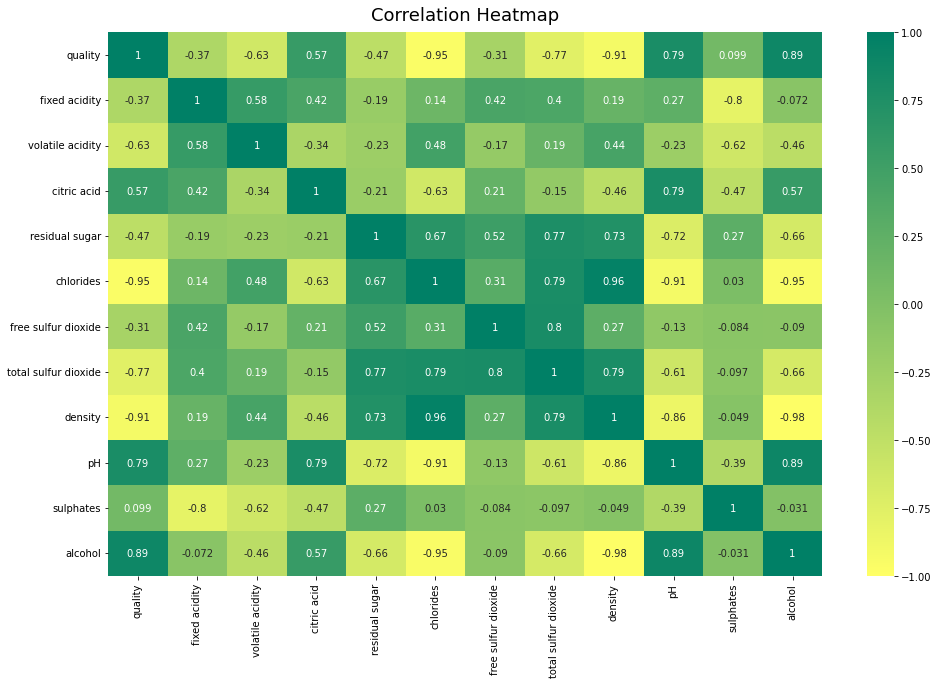

In [25]:
#Correlation chemical map to observe the best variables 
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(white_ridgeline.corr(), vmin=-1, vmax=1, annot=True, cmap='summer_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)



Red Wine Correlation after outlers detection

Text(0.5, 1.0, 'Correlation Heatmap')

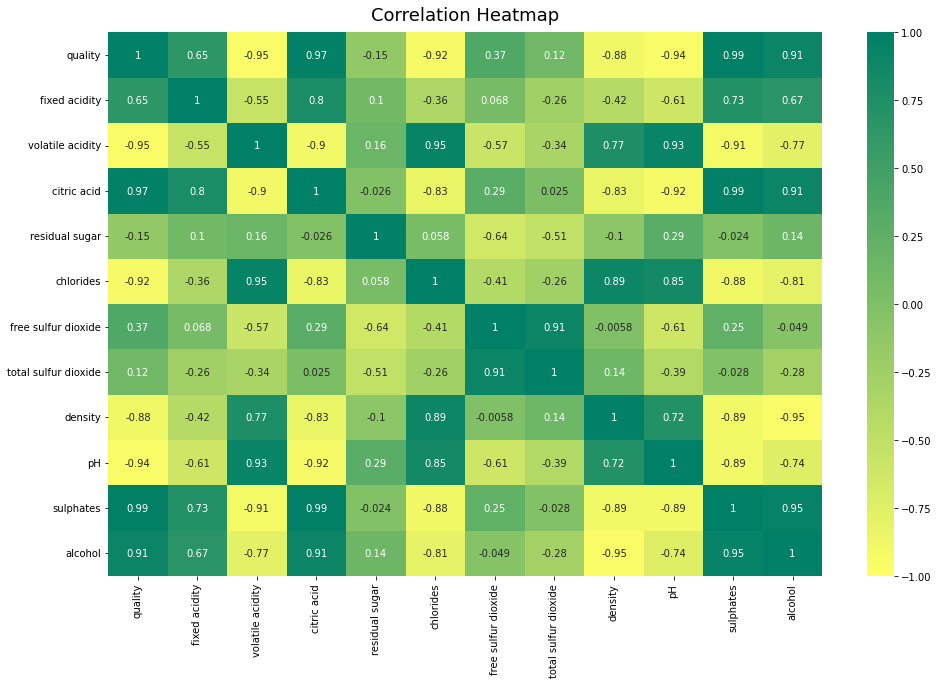

In [26]:
#Correlation chemical map to observe the best variables 
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(red_ridgeline.corr(), vmin=-1, vmax=1, annot=True, cmap='summer_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)



### <center> Return to our masters datasets </center>

In [27]:
white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [28]:
red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# White Wine Prediction

### Using Zscore to normalize the data 

In [29]:
#Zscore normalization 

#White wines
z = np.abs(stats.zscore(white))
white = white[(z < 3).all(axis=1)]

#Red wines
z = np.abs(stats.zscore(red))
red = red[(z < 3).all(axis=1)]


## <center> Data Preprocessing </center>

In [30]:
#Label encoder to quality column

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    return df

label_encode(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [31]:
#TypeError: Cannot index by location index with a non-integer key
white.loc[:,'quality'] = white.loc[:,'quality'].astype('category').cat.codes
red.loc[:,'quality'] = red.loc[:,'quality'].astype('category').cat.codes



In [32]:
X = np.asarray(white.iloc[:,:-1])
y = np.asarray(white.quality)

In [33]:
#Standarizing the model 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = preprocessing.StandardScaler().fit(X).transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression#


logreg = LogisticRegression(multi_class= 'ovr', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print(metrics.confusion_matrix(y_test, y_pred))

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)


              precision    recall  f1-score   support

           0      1.000     0.000     0.000        28
           1      0.579     0.534     0.556       253
           2      0.524     0.806     0.635       408
           3      0.595     0.126     0.209       174
           4      1.000     0.000     0.000        35

    accuracy                          0.541       898
   macro avg      0.740     0.293     0.280       898
weighted avg      0.587     0.541     0.485       898

[[  0  18  10   0   0]
 [  0 135 118   0   0]
 [  0  72 329   7   0]
 [  0   8 144  22   0]
 [  0   0  27   8   0]]
0.5412026726057907


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier# Train and fit the Random Forest Classification model

forest = RandomForestClassifier(n_estimators=100,random_state = 91)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(metrics.classification_report(y_test, y_pred.round(), digits=3))


accuracy = metrics.accuracy_score(y_test, y_pred)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

              precision    recall  f1-score   support

           0      0.857     0.214     0.343        28
           1      0.699     0.735     0.717       253
           2      0.661     0.804     0.726       408
           3      0.763     0.517     0.616       174
           4      0.727     0.229     0.348        35

    accuracy                          0.688       898
   macro avg      0.742     0.500     0.550       898
weighted avg      0.700     0.688     0.675       898

cross validation score with roc_auc_ovr scoring 0.688195991091314


##  Gradient Decent Classifier

In [37]:
model_GB = GradientBoostingClassifier(min_samples_leaf=5,max_leaf_nodes=5)
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(X_test)

model_GB.score(X_train, y_train)


0.6831986625801059

### XGBoost

In [38]:
model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=3000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)

model_XGB.score(X_train, y_train)

0.8161047645583728

### KNeighborsClassifier

In [39]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)

KNN_classifier.score(X_train, y_train)

0.7857341877960434

In [40]:
### Saving predictions

In [41]:
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions_XGB)]
model_XGB.fit(X_test,predictions)
predictions = model_XGB.predict(X_test)
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions)]

<module 'matplotlib.pyplot' from '/home/dm/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

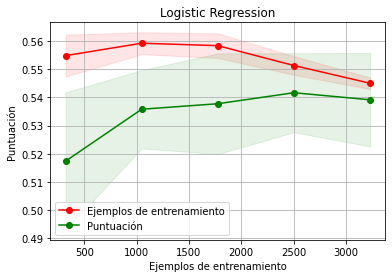

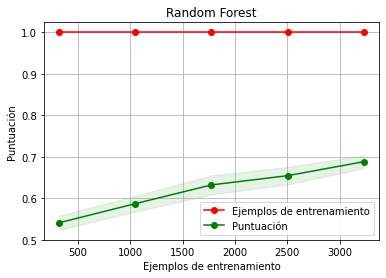

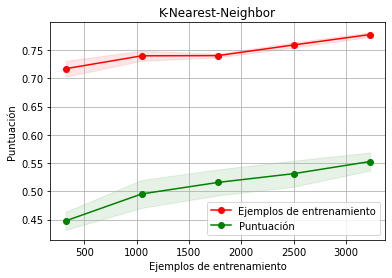

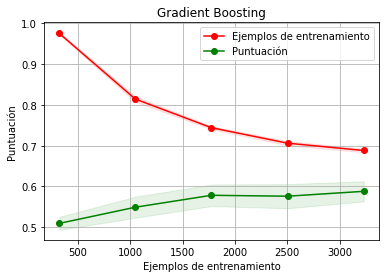

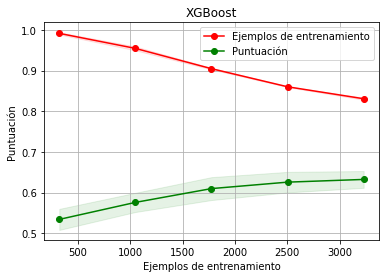

In [42]:
from sklearn.model_selection import learning_curve

learning_curve(logreg, X_train, y_train, cv=10, n_jobs=-1)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ejemplos de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logreg, "Logistic Regression", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(forest, "Random Forest", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(KNN_classifier, "K-Nearest-Neighbor", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_GB, "Gradient Boosting", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_XGB, "XGBoost", X_train, y_train, cv=10, n_jobs=-1)

## Red Wine Prediction

### Using Zscore to normalize the data 

In [43]:

z = np.abs(stats.zscore(red))
red = red[(z < 3).all(axis=1)]
label_encode(red)
X = np.asarray(red.iloc[:,:-1])
y = np.asarray(red.quality)

X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)


## Logistic Regression

In [44]:
logreg = LogisticRegression(multi_class= 'ovr', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print(metrics.confusion_matrix(y_test, y_pred))

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0      1.000     0.000     0.000         5
           1      0.648     0.692     0.669       117
           2      0.512     0.589     0.548       112
           3      0.455     0.172     0.250        29
           4      1.000     0.000     0.000         2

    accuracy                          0.574       265
   macro avg      0.723     0.291     0.293       265
weighted avg      0.578     0.574     0.554       265

[[ 0  4  1  0  0]
 [ 0 81 36  0  0]
 [ 0 40 66  6  0]
 [ 0  0 24  5  0]
 [ 0  0  2  0  0]]
0.5735849056603773


## RandomForestClassifier

In [45]:
forest = RandomForestClassifier(n_estimators=100,random_state = 91)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(metrics.classification_report(y_test, y_pred.round(), digits=3))


accuracy = metrics.accuracy_score(y_test, y_pred)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.752     0.752     0.752       117
           2      0.675     0.705     0.690       112
           3      0.667     0.690     0.678        29
           4      1.000     0.500     0.667         2

    accuracy                          0.709       265
   macro avg      0.619     0.529     0.557       265
weighted avg      0.698     0.709     0.703       265

cross validation score with roc_auc_ovr scoring 0.7094339622641509


/home/dm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/dm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/dm/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## GradientBoostingClassifier

In [46]:
model_GB = GradientBoostingClassifier(min_samples_leaf=5,max_leaf_nodes=5)
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(X_test)

model_GB.score(X_train, y_train)


0.8543046357615894

## XGBClassifier

In [47]:
model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=3000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)

model_XGB.score(X_train, y_train)

0.9583727530747398

In [48]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)

KNN_classifier.score(X_train, y_train)

0.7738883632923368

In [49]:
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions_XGB)]
model_XGB.fit(X_test,predictions)
predictions = model_XGB.predict(X_test)
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions)]

<module 'matplotlib.pyplot' from '/home/dm/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

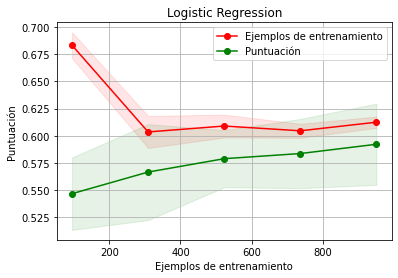

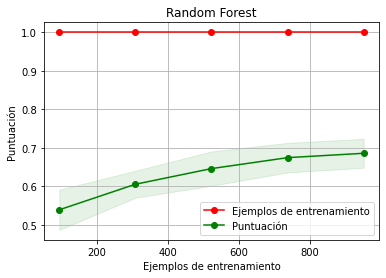

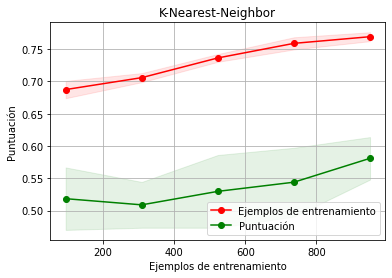

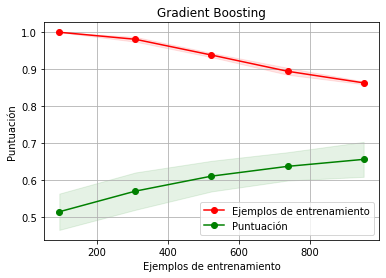

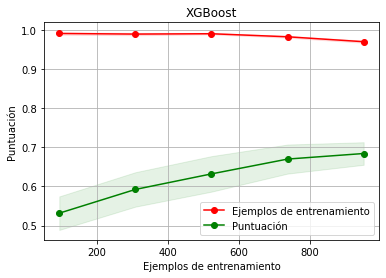

In [50]:

learning_curve(logreg, X_train, y_train, cv=10, n_jobs=-1)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ejemplos de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logreg, "Logistic Regression", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(forest, "Random Forest", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(KNN_classifier, "K-Nearest-Neighbor", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_GB, "Gradient Boosting", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_XGB, "XGBoost", X_train, y_train, cv=10, n_jobs=-1)